In [1]:
# Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs. Using the above data companies can then outperform the competition by developing uniquely appealing products and services.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Wholesale customers data.csv to Wholesale customers data.csv


In [3]:
# Importing the dataset
dataset = pd.read_csv('Wholesale customers data.csv')
dataset

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Importing the dataset
dataset = pd.read_csv('/content/Wholesale customers data.csv')

In [7]:
print(dataset)

     Channel  Region  Fresh  ...  Frozen  Detergents_Paper  Delicassen
0          2       3  12669  ...     214              2674        1338
1          2       3   7057  ...    1762              3293        1776
2          2       3   6353  ...    2405              3516        7844
3          1       3  13265  ...    6404               507        1788
4          2       3  22615  ...    3915              1777        5185
..       ...     ...    ...  ...     ...               ...         ...
435        1       3  29703  ...   13135               182        2204
436        1       3  39228  ...    4510                93        2346
437        2       3  14531  ...     437             14841        1867
438        1       3  10290  ...    1038               168        2125
439        1       3   2787  ...      65               477          52

[440 rows x 8 columns]


In [8]:
#Print Total number of Rows & columns in dataset
print(dataset.shape)

(440, 8)


In [9]:
#Print Information about data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [10]:
types = dataset.dtypes
print(types)

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


In [13]:
#Count total number of classes in Data
class_counts = dataset.groupby('Frozen').size()
print(class_counts)

Frozen
25       1
33       1
36       1
38       1
42       1
        ..
18028    1
18711    1
35009    1
36534    1
60869    1
Length: 426, dtype: int64


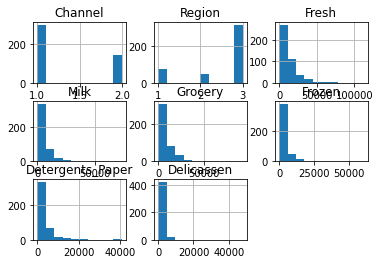

In [14]:
from matplotlib import pyplot
dataset.hist()
pyplot.show()

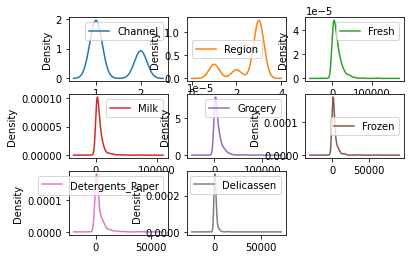

In [15]:
dataset.plot(kind='density' ,subplots=True, layout=(3,3), sharex=False)
pyplot.show()

In [17]:
# Extracting features of dataset

X = dataset.iloc[:, [2, 3]].values


In [18]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)

In [19]:
print(X)


[[ 5.29331898e-02  5.23567773e-01]
 [-3.91301970e-01  5.44457667e-01]
 [-4.47029261e-01  4.08537706e-01]
 [ 1.00111407e-01 -6.24019925e-01]
 [ 8.40239480e-01 -5.23964546e-02]
 [-2.04805527e-01  3.34066589e-01]
 [ 9.95035090e-03 -3.52315651e-01]
 [-3.49981451e-01 -1.13980948e-01]
 [-4.77900913e-01 -2.91409401e-01]
 [-4.74497115e-01  7.18494904e-01]
 [-6.83474454e-01 -5.33459952e-02]
 [ 9.06915953e-02 -6.33786629e-01]
 [ 1.56049887e+00  8.84800166e-01]
 [ 7.29576481e-01  5.58511794e-02]
 [ 1.00156365e+00  4.97658878e-01]
 [-1.38312738e-01 -6.35143116e-01]
 [-8.69179316e-01  4.09622895e-01]
 [-4.84787666e-01  4.89330975e-02]
 [ 5.22498936e-01  7.19933704e-02]
 [-3.34070677e-01 -4.47812310e-01]
 [ 4.38987159e-01 -1.73259414e-01]
 [-5.09247514e-01 -6.68105741e-01]
 [ 1.52582763e+00 -5.26217238e-01]
 [ 1.13771556e+00  4.15447557e+00]
 [ 8.42772539e-01  5.39845613e-01]
 [ 3.29669847e-01 -2.12461878e-01]
 [-1.66413857e-01 -6.55897361e-01]
 [ 1.80140229e-01 -6.77329850e-01]
 [-6.24343366e-01  1

In [20]:
dataset.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [21]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [22]:
wcss

[880.0,
 598.1006361673309,
 383.9852027517867,
 274.43659814477655,
 205.91452100720895,
 168.37678943512253,
 133.1320100027759,
 110.19444463183096,
 96.28130292646202,
 84.01317654193201]

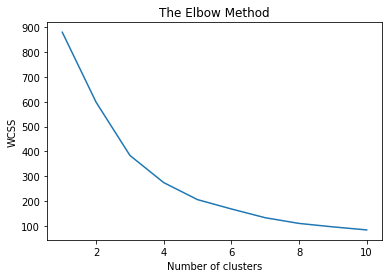

In [23]:
plt.plot(range(1, 11), wcss)

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [24]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
print(kmeans)
y_kmeans = kmeans.fit_predict(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)


In [25]:
y_kmeans

array([0, 0, 2, 2, 3, 2, 2, 2, 2, 0, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 2,
       3, 4, 3, 3, 2, 3, 0, 1, 3, 2, 3, 3, 2, 2, 3, 0, 0, 1, 3, 3, 2, 0,
       2, 0, 0, 4, 2, 0, 2, 2, 1, 0, 3, 2, 0, 0, 3, 2, 2, 4, 2, 0, 2, 0,
       2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 0, 2, 2, 2, 0, 0, 3, 2, 4, 4, 1,
       2, 3, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 3, 3, 2, 0, 2, 0,
       2, 0, 3, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 0, 1, 1, 3, 3, 2, 1, 2, 2,
       3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 1, 2, 3, 3, 2, 2, 2, 3, 3, 2, 3, 0,
       2, 0, 2, 3, 2, 2, 2, 2, 3, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 4, 2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 2, 3, 3, 2,
       2, 2, 0, 0, 3, 2, 2, 0, 2, 2, 2, 0, 3, 0, 2, 2, 2, 0, 0, 3, 2, 2,
       3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 0, 3, 2, 3, 2, 2, 3, 2, 1, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 2, 2, 0, 2, 3, 0, 3, 2, 2, 1, 1, 2, 2, 3, 2,
       0, 0, 0, 3, 2, 3, 2, 2, 2, 1, 2, 2, 3, 2, 2, 3, 2, 2, 1, 3, 1, 1,
       2, 3, 3, 1, 2, 2, 2, 0, 3, 2, 3, 2, 2, 2, 3,

kmeans++
1). Randomly select the first centroid from the data points.
2). For each data point compute its distance from the nearest, previously choosen centroid.
3). Select the next centroid from the data points such that the probability of choosing a point as centroid is directly proportional to its distance from the nearest, previously chosen centroid. (i.e. the point having maximum distance from the nearest centroid is most likely to be selected next as a centroid)
4)Repeat steps 2 and 3 untill k centroids have been sampled

In [26]:
print("Within cluster sum of square when k=5", kmeans.inertia_)

Within cluster sum of square when k=5 205.91452100720895


In [27]:
print("center of Cluster are", kmeans.cluster_centers_ )

center of Cluster are [[-0.50404644  1.2149957 ]
 [ 3.01191629 -0.18297063]
 [-0.50584078 -0.32523504]
 [ 0.72818242 -0.24114403]
 [ 1.46004727  5.83104784]]


In [28]:
print("Number of iterations", kmeans.n_iter_) 

Number of iterations 11


In [29]:
print(X[:,0])

[ 5.29331898e-02 -3.91301970e-01 -4.47029261e-01  1.00111407e-01
  8.40239480e-01 -2.04805527e-01  9.95035090e-03 -3.49981451e-01
 -4.77900913e-01 -4.74497115e-01 -6.83474454e-01  9.06915953e-02
  1.56049887e+00  7.29576481e-01  1.00156365e+00 -1.38312738e-01
 -8.69179316e-01 -4.84787666e-01  5.22498936e-01 -3.34070677e-01
  4.38987159e-01 -5.09247514e-01  1.52582763e+00  1.13771556e+00
  8.42772539e-01  3.29669847e-01 -1.66413857e-01  1.80140229e-01
 -6.24343366e-01  2.46084291e+00  5.39438766e-01 -7.43159648e-01
  7.62427085e-01  1.40337008e+00 -8.31025120e-01 -8.95459799e-01
  1.42125981e+00  2.50749238e-01 -5.86505802e-01  3.49551821e+00
  9.51852377e-01  5.68014834e-01 -9.10553626e-02 -9.00050968e-01
 -1.84461900e-01 -5.39802533e-01 -7.04293029e-01  2.56992275e+00
 -3.80986053e-02 -5.56742363e-01 -4.53678540e-01 -6.84978457e-01
  2.27347573e+00 -9.11053941e-01  1.21339068e+00 -5.33232413e-01
 -6.25530737e-01 -5.21121226e-01  1.40798662e-01 -4.64127406e-01
 -2.69952630e-01  1.89517

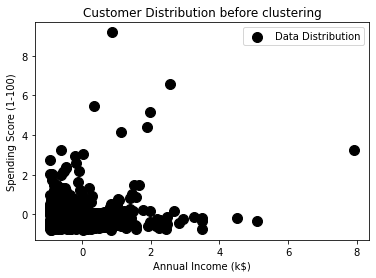

In [30]:
# Visualising the clusters
plt.scatter(X[:,0], X[:,1], s = 100, c = 'black', label = 'Data Distribution')
plt.title('Customer Distribution before clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [31]:
frame = pd.DataFrame(X)
frame['cluster'] = y_kmeans
frame['cluster'].value_counts()

2    243
3    108
0     61
1     22
4      6
Name: cluster, dtype: int64

In [32]:
 Annual_Income =  56#@param {type:"number"}
Spending_Score = 13000 #@param {type:"number"}

predict= kmeans.predict(ss.transform([[ Annual_Income,Spending_Score ]]))
print(predict)
if predict==[0]:
  print("Customer is careless")

elif predict==[1]:
  print("Customer is standard")
elif predict==[2]:
  print("Customer is Target")
elif predict==[3]:
  print("Customer is careful")

else:
  print("Custmor is sensible" )



[0]
Customer is careless


In [33]:
y_kmeans == 4, 1

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True,  True, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

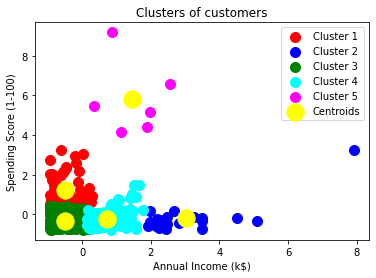

In [36]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans== 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

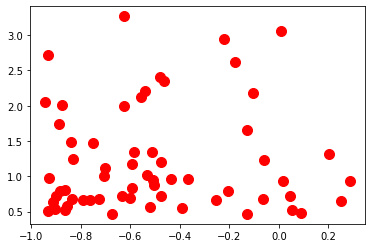

In [37]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Careless')

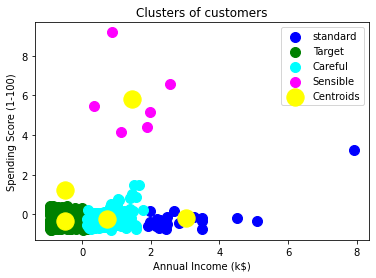

In [38]:
# Visualising the clusters

plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Careful')
plt.scatter(X[y_kmeans== 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [39]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(kmeans) 
  
# Load the pickled model 
Saved_Model = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
Saved_Model.predict(X)

array([0, 0, 2, 2, 3, 2, 2, 2, 2, 0, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 2,
       3, 4, 3, 3, 2, 3, 0, 1, 3, 2, 3, 3, 2, 2, 3, 0, 0, 1, 3, 3, 2, 0,
       2, 0, 0, 4, 2, 0, 2, 2, 1, 0, 3, 2, 0, 0, 3, 2, 2, 4, 2, 0, 2, 0,
       2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 0, 2, 2, 2, 0, 0, 3, 2, 4, 4, 1,
       2, 3, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 3, 3, 2, 0, 2, 0,
       2, 0, 3, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 0, 1, 1, 3, 3, 2, 1, 2, 2,
       3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 1, 2, 3, 3, 2, 2, 2, 3, 3, 2, 3, 0,
       2, 0, 2, 3, 2, 2, 2, 2, 3, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 4, 2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 2, 3, 3, 2,
       2, 2, 0, 0, 3, 2, 2, 0, 2, 2, 2, 0, 3, 0, 2, 2, 2, 0, 0, 3, 2, 2,
       3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 0, 3, 2, 3, 2, 2, 3, 2, 1, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 2, 2, 0, 2, 3, 0, 3, 2, 2, 1, 1, 2, 2, 3, 2,
       0, 0, 0, 3, 2, 3, 2, 2, 2, 1, 2, 2, 3, 2, 2, 3, 2, 2, 1, 3, 1, 1,
       2, 3, 3, 1, 2, 2, 2, 0, 3, 2, 3, 2, 2, 2, 3,

In [41]:
import joblib
filename = '/content/drive/My Drive/KMeans_Model_customer_segmentaion.sav'
joblib.dump(kmeans, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)


In [42]:
import pickle 
print("[INFO] Saving model...")
# Save the trained model as a pickle string. 
saved_model=pickle.dump(kmeans,open('/content/drive/My Drive/kmeanscluster.pkl', 'wb')) 
# Saving model to disk

[INFO] Saving model...


In [43]:
# Load the pickled model 
model = pickle.load(open('/content/drive/My Drive/kmeanscluster.pkl','rb'))  
# Use the loaded pickled model to make predictions 
model.predict(X)

array([0, 0, 2, 2, 3, 2, 2, 2, 2, 0, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 2,
       3, 4, 3, 3, 2, 3, 0, 1, 3, 2, 3, 3, 2, 2, 3, 0, 0, 1, 3, 3, 2, 0,
       2, 0, 0, 4, 2, 0, 2, 2, 1, 0, 3, 2, 0, 0, 3, 2, 2, 4, 2, 0, 2, 0,
       2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 0, 2, 2, 2, 0, 0, 3, 2, 4, 4, 1,
       2, 3, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 3, 3, 2, 0, 2, 0,
       2, 0, 3, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 0, 1, 1, 3, 3, 2, 1, 2, 2,
       3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 1, 2, 3, 3, 2, 2, 2, 3, 3, 2, 3, 0,
       2, 0, 2, 3, 2, 2, 2, 2, 3, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 4, 2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 2, 3, 3, 2,
       2, 2, 0, 0, 3, 2, 2, 0, 2, 2, 2, 0, 3, 0, 2, 2, 2, 0, 0, 3, 2, 2,
       3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 0, 3, 2, 3, 2, 2, 3, 2, 1, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 2, 2, 0, 2, 3, 0, 3, 2, 2, 1, 1, 2, 2, 3, 2,
       0, 0, 0, 3, 2, 3, 2, 2, 2, 1, 2, 2, 3, 2, 2, 3, 2, 2, 1, 3, 1, 1,
       2, 3, 3, 1, 2, 2, 2, 0, 3, 2, 3, 2, 2, 2, 3,

In [44]:
!pip install flask-ngrok

In [45]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
%mkdir templates -p

In [47]:
%%writefile templates/index.html
<!DOCTYPE html>
<html >
<!--From https://codepen.io/frytyler/pen/EGdtg-->
<head>
<title>Machine Learning Lab Experiment Deployment</title>
<meta charset="UTF-8">
<link href='https://fonts.googleapis.com/css?family=Pacifico' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/css?family=Arimo' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/css?family=Hind:300' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/css?family=Open+Sans+Condensed:300' rel='stylesheet' type='text/css'>
 <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.0.0-beta1/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-giJF6kkoqNQ00vy+HMDP7azOuL0xtbfIcaT9wjKHr8RbDVddVHyTfAAsrekwKmP1" crossorigin="anonymous"> 
<style><!DOCTYPE html>

h1 {text-align: center;}
h2 {text-align: center;}
h3 {text-align: center;}
p {text-align: center;}
div {text-align: center;}
</style>
</head>

<body>
 
     
<div class="" style="background-color:blue;" >
<div class="clearfix">
           
<div class="col-md-12">
<center><p style="font-size:40px;color:white;margin-top:10px;">Poornima Institute of Engineering & Technology</p></center> 
<center><p style="font-size:30px;color:white;margin-top:10px;">Department of Computer Engineering</p></center> 
<center><p style="font-size:25px;color:white;margin-top:10px;">Machine Learning Lab Experiment Deployment</p></center> 
</div>
</div>
</div>

<div class="login">
<h2 >K Means clustering Customer segmentation</h2>
<h4>Developed by Deepak Moud</h4>
<!-- Main Input For Receiving Query to our ML -->
<form action="{{ url_for('predict')}}"method="get">

 
    <div class="mb-3">
  <label for="exampleFormControlInput1" class="form-label">Annual Incomein $</label>
      <input type="number" name="income" id="income" value="" min="1" max="140" placeholder="" required="required">
      </div>
      <div class="mb-3">
  <label for="exampleFormControlInput1" class="form-label">spending Score</label>
      <input type="number"  name="score" id="score" value=""min="1" max="100" placeholder="1" required="required">
      </div>
  
  <div class="col-auto">
 
    <button type="submit" class="btn btn-danger">predict type of Customer</button>
  </div>
</form>

<br>
<br>
{{ prediction_text }}

</div>

<div class="" style="background-color:blue;" >
<div class="clearfix">
           
<div class="col-md-12">
 <center><p style="font-size:25px;color:white;margin-top:20px;">Machine Learning Lab Experiment 7</p></center> 
</div>
</div>
</div>
</body>
</html>

Writing templates/index.html


In [ ]:
!pip install flask-ngrok
import numpy as np
from flask import Flask, request, jsonify, render_template
from flask_ngrok import run_with_ngrok
import pickle


app = Flask(__name__)
model = pickle.load(open('/content/drive/My Drive/kmeanscluster.pkl','rb'))   
run_with_ngrok(app)

@app.route('/')
def home():
  
    return render_template("index.html")
  
@app.route('/predict',methods=['GET'])
def predict():
  '''
  For rendering results on HTML GUI
  '''
  income = int(request.args.get('income'))
  score = int(request.args.get('score'))
    
    
  predict = model.predict([[income,score ]])
  if predict==[0]:
    result="Customer is careless"

  elif predict==[1]:
    result="Customer is standard"
  elif predict==[2]:
    result="Customer is Target"
  elif predict==[3]:
    result="Customer is careful"

  else:
    result="Custmor is sensible"
    
        
  return render_template('index.html', prediction_text='Model  has predicted  : {}'.format(result))


app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://4fa4326166b3.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [17/May/2021 07:57:18] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/May/2021 07:57:20] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [17/May/2021 07:57:20] "GET / HTTP/1.1" 200 -
